# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [ ]:
Observation #1: Ramicane is the most effective drug regimen as the mean tumor volume is the smallest from mice treated with this drug
Observation #2: The gender distribution is almost equal in the study so that should not be factor in skewing the results
Observation #3: There is a positive coorelation between the average tumor size versus weight. The tumor sizes are typically larger in heavier mice

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the new dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_df                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
new_df
             

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#new_df = merge_df.loc[merge_df["Mouse ID"]!='g989']
#len(new_df["Mouse ID"].unique())

clean_df = new_df.drop_duplicates("Mouse ID")
clean_df
                      

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

#calculate the request measures of central tendencies
mean_tumor = new_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor = new_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor = new_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sd_tumor = new_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor = new_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume" : mean_tumor,
                           "Median Tumor Volume" : median_tumor,
                            "Tumor Volume Variane" : var_tumor,
                            "Tumor Volume Std. Dev." : sd_tumor,
                            "Tumor Volume Std. Err." : sem_tumor})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variane,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

In [8]:
summary_aggregation_df = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summary_aggregation_df    

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#define values that need to go into the bar graph
row_count = new_df["Drug Regimen"].value_counts()
row_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

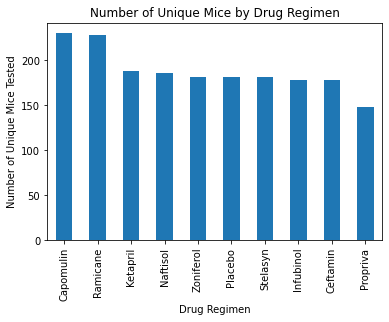

In [10]:
# Use DataFrame.plot() in order to create a bar chart of the data
row_count.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Unique Mice by Drug Regimen")

#name the x and y labels
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

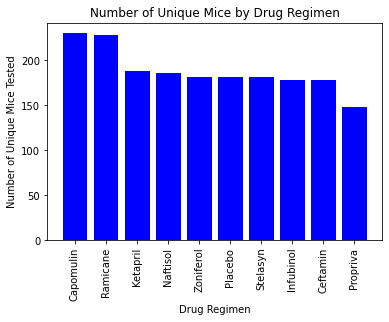

In [11]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot. 
plt.bar(row_count.index.values, row_count.values, color='b', alpha=1, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Unique Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

In [12]:
#define the values that need go go into the pir chart
gender = new_df["Sex"].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

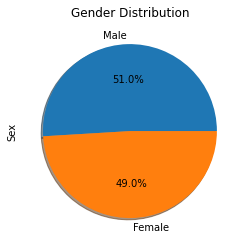

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender.plot(kind="pie", autopct="%1.1f%%", shadow=True)
plt.title("Gender Distribution")
plt.show()

In [14]:
#define keys for gender value_counts
labels = gender.index.values
labels

array(['Male', 'Female'], dtype=object)

In [15]:
#define values for gender value_counts
sizes = gender.values
sizes

array([958, 922], dtype=int64)

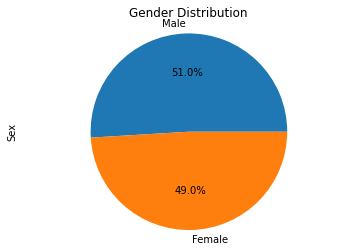

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the last(greatest) timepoint for each mice
greatest_timepoint = new_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df2 = pd.merge(greatest_timepoint, merge_df, on=["Mouse ID", "Timepoint"], how="left")
merge_df2                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    drug_list = merge_df2.loc[merge_df2["Drug Regimen"]==drug , "Tumor Volume (mm3)"] 
    
     # add subset
    tumor_vol_list.append(drug_list)
    
    quartiles = drug_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
         

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    Outliers = drug_list.loc[(drug_list<lower_bound) | (drug_list>upper_bound)]
    print(f"{drug} has {Outliers} outliers")

Capomulin has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers
Ramicane has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers
Infubinol has 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 outliers
Ceftamin has Series([], Name: Tumor Volume (mm3), dtype: float64) outliers


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

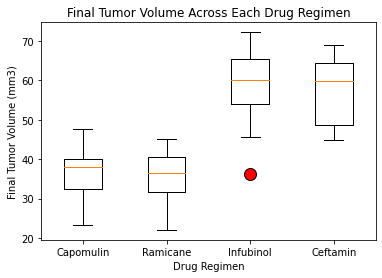

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
plt.title("Final Tumor Volume Across Each Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.show()

## Line and Scatter Plots

In [21]:
#filter data down to mouse treated by Capomulin - (loc function)
Campalolin = merge_df2.loc[merge_df2["Drug Regimen"]=="Capomulin"]
Campalolin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [22]:
#isloate data to be used in line plot
Campalolin_Tumor = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]
Campalolin_Tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [23]:
#select one mouse to display tumor size over time
Mouse_Data = Campalolin_Tumor.loc[Campalolin_Tumor["Mouse ID"]=="b128"]
Mouse_Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


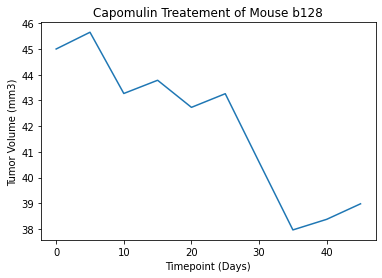

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(Mouse_Data["Timepoint"],Mouse_Data["Tumor Volume (mm3)"])
plt.title("Capomulin Treatement of Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
#isolate data for scatterplot
Weight = Campalolin_Tumor.groupby(["Mouse ID"]).mean()
Weight

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


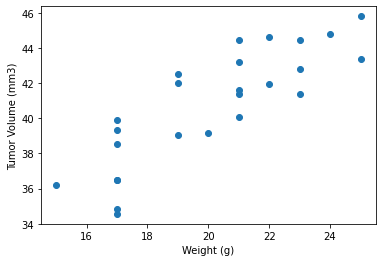

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(Weight["Weight (g)"],Weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [27]:
#compute the Pearson correlation coefficient between "Average Tumor Volume" and "Mouse Weight"
mouse_weight = Weight["Weight (g)"]
avg_tumor = Weight["Tumor Volume (mm3)"]
correlation = st.pearsonr(mouse_weight, avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


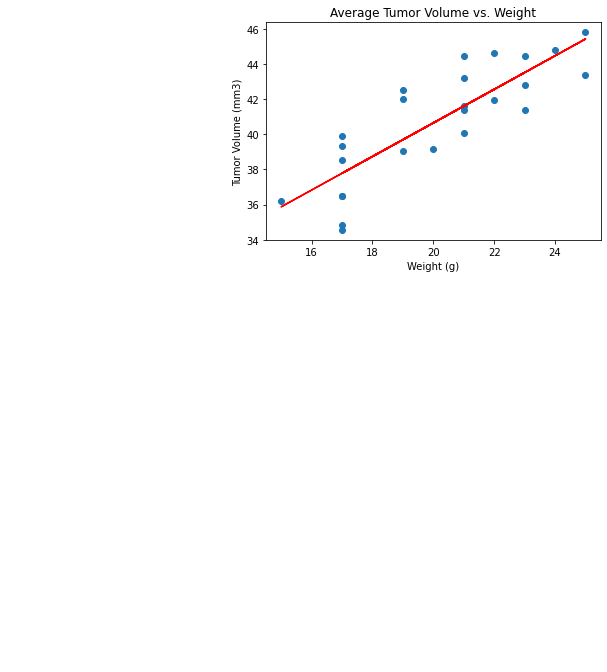

In [28]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
x_values = Weight['Weight (g)']
y_values = Weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()